### This Demo outlines data cleaning steps (necessary or benefical) for machine learning
Data is read in from a csv file from an AWS S3 bucket
The list of data cleaning TODO items includes:

    1. identify the size of the dataset (number of rows and columns)
    
    2. identifty the column names (features) checking for duplicate columns (in this case the dataframe has an index and the csv file had an index)
    
    3. identify the data type (dtypes) of the data i.e. numberic(int or float) vs. string(object)
    
    4. identify which columns (features) have missing (NaN) values. identify if NaN can be represented (imputed) or needs to be dropped
    
    5. identify if any columns need to be renamed
    
    6. identify if columns would make better sense if there were reordered
    
    7. identify if any columns (features) need to be recast to numeric or string values (due to some earlier data cleaning step)
    
    8. identify if unique values within a column are adequately represented with a large sample. If not consider dropping those unique values from the column
        
    9. identify if a feature's distribution (spread of the data) is skewed (due to presence of outliers).  Removed outliers as needed.
    
    10. identify if any additional columns (features) could be created from existing features
    
    11. identify if additional hierarchical indexing would benefit the machine learning process (categorization)
    
    
    

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in csv file stored in an AWS S3 bucket (url)
# create pandas DataFrame
url = "https://winedata150k.s3.us-east-2.amazonaws.com/winemag-data_first150k.csv"

wine_df = pd.read_csv(url)


# view the first few lines of the DataFrame
wine_df.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

#### 1. identify the size of the dataset (number of rows and columns)

In [3]:
# 1. identify the size of the dataset
# how many rows and columns are there?
wine_df.shape

# there are just over 150k rows and 11 columns

(150930, 11)

#### 2. identifty the column names (features) checking for duplicate columns (in this case the dataframe has an index and the csv file had an index)

In [4]:
# 2. identifty the column names (features) checking for duplicate (or not useful) columns
# identify column names
wine_df.columns

# in this case the dataframe has an index and the csv file had an index
# the duplicate column ('Unnamed: 0') needs to be dropped

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
# drop column "Unnamed: 0" as there appears to be little information in this column
wine_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# confirm the column was dropped
wine_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

#### 3. identify the data type (dtypes) of the data i.e. numberic(int or float) vs. string(object)

In [7]:
# 3. identify the data type (dtypes) of the data i.e. numberic(int or float) vs. string(object)
# what are the dtpyes for each column?
wine_df.dtypes

# notice the only numeric data is points(float) and price(int)

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

#### 4, 5, 6 & 7. 
####           4. identify which columns (features) have missing (NaN) values. 
####           5. identify if NaN can be represented (imputed) or needs to be dropped and identify if any columns need to be renamed
####           6. identify if columns would make better sense if there were reordered
####           7. identify if any columns (features) need to be recast to numeric or string values (due to some earlier data cleaning step)

In [8]:
# 4. identify which columns (features) have missing (NaN) values. identify if NaN can be replaced or substituted (imputed) or needs to be dropped
# what are the value counts for each column?
wine_df.info()

# Note: there are very few 'region_2' non-null values. Since this does not appear to add much additional value this feature (column) will be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [9]:
# drop column "region_2" due to low number of non-null values (and there appears to be little additoinal information in this column)
wine_df.drop(columns=['region_2'], inplace=True)

In [10]:
# confirm the column was dropped
wine_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'variety', 'winery'],
      dtype='object')

In [11]:
# Note there are a number of missing price values (see points 150930 vs. price 137235)
# deterine the count of the NaN values
count_price_na = wine_df["price"].isna().sum()
print(f"count where price is NaN is: {count_price_na}")

wine_df.count()

# there are 13,695 missing (NaN) price values - the entries with missing price values will be dropped

count where price is NaN is: 13695


country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
variety        150930
winery         150930
dtype: int64

In [12]:
# Drop NaN's from price and examine remaining value counts
wine_df.dropna(subset=['price'], inplace=True)

wine_df.count(0)

# now there are 137,235 entries with both points and price

country        137230
description    137235
designation     94924
points         137235
price          137235
province       137230
region_1       114393
variety        137235
winery         137235
dtype: int64

In [13]:
# there are five wines without a listed country (see country 137230 vs. winery 137235)
# let's drop the five wines without a country
wine_df.dropna(subset=['country'], inplace=True)

wine_df.count(0)

# there are now 137,230 enties (wine samples) that have country, description, points, price, province, variety and winery
# there are several that are missing designation and region_1

country        137230
description    137230
designation     94919
points         137230
price          137230
province       137230
region_1       114393
variety        137230
winery         137230
dtype: int64

In [14]:
# 5. identify if any columns need to be renamed
# focus on the missing "designation" by changing designation to "name"
# let's rename the column 'designation' to 'name'
wine_df = wine_df.rename(columns={"designation": "name"})
wine_df

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
150925   Italy  Many people feel Fiano represents southern Ita...   
150926  France  Offers an intriguing nose with ginger, lime an...   
150927   Italy  This classic example comes from a cru vineyard...   
150928  France  A perfect salmon shade, with scents of peaches...   
150929   Italy  More Pinot Grigios should taste like this. A r...   

                                        name  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1             variety  \
0               California        Napa Valley  Cabernet Sauvignon   
1           Northern Spain               Toro       Tinta de Toro   
2               California     Knights Valley     Sauvignon Blanc   
3                   Oregon  Willamette Valley          Pinot Noir   
4                 Provence             Bandol  Provence red blend   
...                    ...                ...                 ...   
150925      Southern Italy  Fiano di Avellino         White Blend   
150926           Champagne          Champagne     Champagne Blend   
150927      Southern Italy  Fiano di Avellino         White Blend   
150928           Champagne          Champagne     Champagne Blend   
150929  Northeastern Italy         Alto Adige        Pinot Grigio   

                         winery  
0                         Heitz  
1       Bodega Carmen Rodríguez  
2                      Macauley  
3                         Ponzi  
4          Domaine de la Bégude  
...                         ...  
150925    Feudi di San Gregorio  
150926                H.Germain  
150927                Terredora  
150928                   Gosset  
150929            Alois Lageder  

[137230 rows x 9 columns]

In [15]:
# there appears to be several wines without a name (formally 'designation')
# We can use a concatenation (combination) of the "variety" and "winery" as a fill for name
# create new column which is a concatenation of "variety_from_winery"
wine_df["variety_from_winery"] = wine_df["variety"] + "_from_" + wine_df["winery"]
wine_df.head(65)

country                                        description  \
0          US  This tremendous 100% varietal wine hails from ...   
1       Spain  Ripe aromas of fig, blackberry and cassis are ...   
2          US  Mac Watson honors the memory of a wine once ma...   
3          US  This spent 20 months in 30% new French oak, an...   
4      France  This is the top wine from La Bégude, named aft...   
..        ...                                                ...   
62  Argentina  Smoky aromas of fresh-cut wood blend with berr...   
63     France  L'Homme Mort is a northern extension of the Fo...   
64   Portugal  This is a super-ripe, still very young wine. I...   
65         US  Fresh boysenberries and a blueberry sorbet cha...   
66     France  The steely character of a young Chablis is ver...   

                                    name  points  price          province  \
0                      Martha's Vineyard      96  235.0        California   
1   Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2          Special Selected Late Harvest      96   90.0        California   
3                                Reserve      96   65.0            Oregon   
4                             La Brûlade      95   66.0          Provence   
..                                   ...     ...    ...               ...   
62                 Alegoría Gran Reserva      91   25.0  Mendoza Province   
63              L'Homme Mort Premier Cru      91   45.0          Burgundy   
64                                   NaN      91   23.0        Alentejano   
65                         Estate Select      91   36.0        California   
66                Fourchaume Premier Cru      91   38.0          Burgundy   

              region_1             variety                   winery  \
0          Napa Valley  Cabernet Sauvignon                    Heitz   
1                 Toro       Tinta de Toro  Bodega Carmen Rodríguez   
2       Knights Valley     Sauvignon Blanc                 Macauley   
3    Willamette Valley          Pinot Noir                    Ponzi   
4               Bandol  Provence red blend     Domaine de la Bégude   
..                 ...                 ...                      ...   
62             Mendoza              Malbec          Navarro Correas   
63             Chablis          Chardonnay      Domaine Chenevières   
64                 NaN      Portuguese Red         Herdade do Rocim   
65  Santa Clara Valley               Syrah           Jason-Stephens   
66             Chablis          Chardonnay                Louis Max   

                             variety_from_winery  
0                  Cabernet Sauvignon_from_Heitz  
1     Tinta de Toro_from_Bodega Carmen Rodríguez  
2                  Sauvignon Blanc_from_Macauley  
3                          Pinot Noir_from_Ponzi  
4   Provence red blend_from_Domaine de la Bégude  
..                                           ...  
62                   Malbec_from_Navarro Correas  
63           Chardonnay_from_Domaine Chenevières  
64          Portuguese Red_from_Herdade do Rocim  
65                     Syrah_from_Jason-Stephens  
66                     Chardonnay_from_Louis Max  

[65 rows x 10 columns]

In [16]:
# 6. identify if columns would make better sense if there were reordered
# Let's reorder the columns so that the newly created variety_from_winery is just before 'name'
# also ensure 'province' is before 'region_1' 
# and there are no other missing values in other columns
column_names = ['country', 'winery', 'variety', 'province', 'region_1', 'variety_from_winery', 'name', 'points', 'price', 'description']
wine_df = wine_df.reindex(columns=column_names)

wine_df.head(50)
# Note (as an example) the missing (NaN) values for row with index 42 (missing 'region_1' value) and index 49 (missing 'name' value)
# These same index values will be examined after using the fill forward technique below

country                        winery                  variety  \
0            US                         Heitz       Cabernet Sauvignon   
1         Spain       Bodega Carmen Rodríguez            Tinta de Toro   
2            US                      Macauley          Sauvignon Blanc   
3            US                         Ponzi               Pinot Noir   
4        France          Domaine de la Bégude       Provence red blend   
5         Spain                     Numanthia            Tinta de Toro   
6         Spain                      Maurodos            Tinta de Toro   
7         Spain       Bodega Carmen Rodríguez            Tinta de Toro   
8            US                     Bergström               Pinot Noir   
9            US                     Blue Farm               Pinot Noir   
10        Italy              Borgo del Tiglio                 Friulano   
11           US        Patricia Green Cellars               Pinot Noir   
12           US        Patricia Green Cellars               Pinot Noir   
13       France             Vignobles Brumont                   Tannat   
14           US                Domaine Serene               Pinot Noir   
15           US                     Bergström               Chardonnay   
16           US                          Hall       Cabernet Sauvignon   
17        Spain                      Valduero              Tempranillo   
18       France            Château Lagrézette                   Malbec   
19           US                  Gary Farrell               Pinot Noir   
20           US                         Heitz                     Rosé   
21        Spain                          Muga        Tempranillo Blend   
22        Spain                     Numanthia            Tinta de Toro   
23           US              Center of Effort               Chardonnay   
24           US                      Comartin               Pinot Noir   
25  New Zealand                   Kumeu River               Chardonnay   
26           US                     Bergström               Pinot Noir   
27           US                         Ponzi               Pinot Noir   
28           US                          Roar               Pinot Noir   
29           US                        Saviah                    Syrah   
30     Bulgaria                  Villa Melnik                   Mavrud   
31           US                      Zepaltas               Chardonnay   
33       France                Bouvet-Ladubay          Sparkling Blend   
34           US                          Buty               Chardonnay   
35        Italy                      Carillon               Sangiovese   
36       France  Clos de L'Oratoire des Papes  Rhône-style White Blend   
37        Italy                    Avignonesi               Sangiovese   
38        Italy              Casina di Cornia               Sangiovese   
39        Italy      Castello di Monterinaldi                Red Blend   
40        Spain                Don Bernardino                   Mencía   
41        Spain                González Byass                 Palomino   
42           US                        Huston             Petite Sirah   
43        Italy                       Rignana                Red Blend   
44       France               Tardieu-Laurent                    Syrah   
45        Italy                  Vignavecchia                Red Blend   
46        Italy                         Banfi               Sangiovese   
47           US                      Brandlin       Cabernet Sauvignon   
48        Italy            Brunelli Martoccia               Sangiovese   
49           US                    Canvasback       Cabernet Sauvignon   
50        Italy                 Capanne Ricci               Sangiovese   

              province                      region_1  \
0           California                   Napa Valley   
1       Northern Spain                          Toro   
2           California                Knights Valley   
3        

In [17]:
# check for other missing values before performing a fill forward na technique (as this technique will fill forward all missing (NaN) values)
wine_df.count()

# examination of the counts below show only region_1 and name have missing values (we will apply the fill forward technique and this should result in 137230 non-null values for all features)

country                137230
winery                 137230
variety                137230
province               137230
region_1               114393
variety_from_winery    137230
name                    94919
points                 137230
price                  137230
description            137230
dtype: int64

In [18]:
# fill missing values for region_1 and description uwing fill forward technique to fill missing values NaN with the preceeding value (axis = column or row).
# Note we will be using axis=columns in a cell below
wine_df = wine_df.fillna(method='ffill', axis='columns')

# examine the results of the fill forward 
wine_df.head(50)

# Note index 42 and 49 how fill forward has replaced the NaN values with values from province and variety_from_winery

country                        winery                  variety  \
0            US                         Heitz       Cabernet Sauvignon   
1         Spain       Bodega Carmen Rodríguez            Tinta de Toro   
2            US                      Macauley          Sauvignon Blanc   
3            US                         Ponzi               Pinot Noir   
4        France          Domaine de la Bégude       Provence red blend   
5         Spain                     Numanthia            Tinta de Toro   
6         Spain                      Maurodos            Tinta de Toro   
7         Spain       Bodega Carmen Rodríguez            Tinta de Toro   
8            US                     Bergström               Pinot Noir   
9            US                     Blue Farm               Pinot Noir   
10        Italy              Borgo del Tiglio                 Friulano   
11           US        Patricia Green Cellars               Pinot Noir   
12           US        Patricia Green Cellars               Pinot Noir   
13       France             Vignobles Brumont                   Tannat   
14           US                Domaine Serene               Pinot Noir   
15           US                     Bergström               Chardonnay   
16           US                          Hall       Cabernet Sauvignon   
17        Spain                      Valduero              Tempranillo   
18       France            Château Lagrézette                   Malbec   
19           US                  Gary Farrell               Pinot Noir   
20           US                         Heitz                     Rosé   
21        Spain                          Muga        Tempranillo Blend   
22        Spain                     Numanthia            Tinta de Toro   
23           US              Center of Effort               Chardonnay   
24           US                      Comartin               Pinot Noir   
25  New Zealand                   Kumeu River               Chardonnay   
26           US                     Bergström               Pinot Noir   
27           US                         Ponzi               Pinot Noir   
28           US                          Roar               Pinot Noir   
29           US                        Saviah                    Syrah   
30     Bulgaria                  Villa Melnik                   Mavrud   
31           US                      Zepaltas               Chardonnay   
33       France                Bouvet-Ladubay          Sparkling Blend   
34           US                          Buty               Chardonnay   
35        Italy                      Carillon               Sangiovese   
36       France  Clos de L'Oratoire des Papes  Rhône-style White Blend   
37        Italy                    Avignonesi               Sangiovese   
38        Italy              Casina di Cornia               Sangiovese   
39        Italy      Castello di Monterinaldi                Red Blend   
40        Spain                Don Bernardino                   Mencía   
41        Spain                González Byass                 Palomino   
42           US                        Huston             Petite Sirah   
43        Italy                       Rignana                Red Blend   
44       France               Tardieu-Laurent                    Syrah   
45        Italy                  Vignavecchia                Red Blend   
46        Italy                         Banfi               Sangiovese   
47           US                      Brandlin       Cabernet Sauvignon   
48        Italy            Brunelli Martoccia               Sangiovese   
49           US                    Canvasback       Cabernet Sauvignon   
50        Italy                 Capanne Ricci               Sangiovese   

              province                      region_1  \
0           California                   Napa Valley   
1       Northern Spain                          Toro   
2           California                Knights Valley   
3        

In [19]:
# 7. identify if any columns (features) need to be recast to numeric or string values (due to some earlier data cleaning step)
# check for counts of NaN values and examine if the fillna performed above changed any dtypes (numerics back to strings)
wine_df.info()
wine_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              137230 non-null  object
 1   winery               137230 non-null  object
 2   variety              137230 non-null  object
 3   province             137230 non-null  object
 4   region_1             137230 non-null  object
 5   variety_from_winery  137230 non-null  object
 6   name                 137230 non-null  object
 7   points               137230 non-null  object
 8   price                137230 non-null  object
 9   description          137230 non-null  object
dtypes: object(10)
memory usage: 11.5+ MB


country                object
winery                 object
variety                object
province               object
region_1               object
variety_from_winery    object
name                   object
points                 object
price                  object
description            object
dtype: object

In [20]:
# re-cast/assign 'points' and 'price' as int and float
wine_df = wine_df.astype({
    'points': 'int',
    'price': 'float'})

wine_df.info()
wine_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              137230 non-null  object 
 1   winery               137230 non-null  object 
 2   variety              137230 non-null  object 
 3   province             137230 non-null  object 
 4   region_1             137230 non-null  object 
 5   variety_from_winery  137230 non-null  object 
 6   name                 137230 non-null  object 
 7   points               137230 non-null  int32  
 8   price                137230 non-null  float64
 9   description          137230 non-null  object 
dtypes: float64(1), int32(1), object(8)
memory usage: 11.0+ MB


country                 object
winery                  object
variety                 object
province                object
region_1                object
variety_from_winery     object
name                    object
points                   int32
price                  float64
description             object
dtype: object

#### 8. identify if unique values within a column are adequately represented with a large sample. If not consider dropping those unique values from the column

In [21]:
# starting with country
wine_df['country'].nunique()

# there are 46 unique countries

46

In [22]:
# how many samples do we have for each country?
wine_df['country'].value_counts()

# there appear to be adequate samples for many countries
# we would prefer a more managable list of countries for our visualization
# since we will be using color to visualize countries let's reduce this to countries with at least 1000 samples (Greece and below will not make this 'cut')

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [23]:
# let's filter on countries where we have at least 1000 wines 
# (see https://stackoverflow.com/questions/44329734/filtering-dataframe-based-on-column-value-counts-pandas?noredirect=1&lq=1)
wine_df = wine_df[wine_df.groupby('country')['country'].transform('size')>=1000]
wine_df['country'].value_counts()


US              62139
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Name: country, dtype: int64

In [24]:
# how many unique country values do we have?
print(wine_df['country'].nunique())
# the result is now just 12 countries

12


#### 9. identify if a feature's distribution (spread of the data) is skewed (due to presence of outliers).  Removed outliers as needed.

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

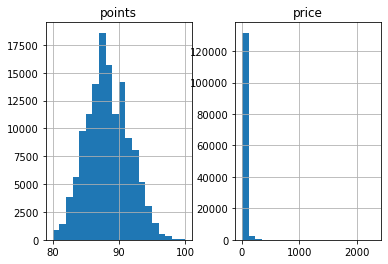

In [25]:
# let's examine the distribution of points and price (the two numeric values in our dataset)
wine_df.hist(bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf86b18cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf86b29400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf86b18970>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf86b29ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf86b29e20>],
 'means': []}

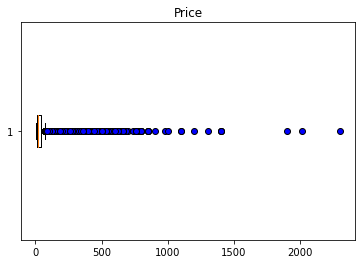

In [26]:
# let's look closer at price for outliers using matplotlib pyplot
blue_circle = dict(markerfacecolor='blue', marker='o')
plt.title('Price')
plt.boxplot(wine_df['price'], vert=False, flierprops=blue_circle)

In [27]:
# what are the descriptive statistics for points and price?
wine_df.describe()

points          price
count  134428.000000  134428.000000
mean       87.815596      33.273403
std         3.226281      36.494229
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000

In [28]:
# Let's use a robust sigma-clipping operation (see p.175 Python Data Science handbook) technique to identify "outliers"
# outliers for this purpose are identified as those that are more than 5 sigma from the mean as outliers
quartiles = np.percentile(wine_df['price'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
wine_df_reduced = wine_df.query('(price > @mu - 5 * @sig) & (price < @mu + 5 * @sig)')

In [29]:
print(f" the 25, 50, and 75 quartiles are: {quartiles}")
print(f" mu (central tendency): {mu}")
print(f" sig (spread of data): {sig}")
print(f" interquartile range: {quartiles[2] - quartiles[0]}")

 the 25, 50, and 75 quartiles are: [16. 24. 40.]
 mu (central tendency): 24.0
 sig (spread of data): 17.759999999999998
 interquartile range: 24.0


In [30]:
# what is our reduced dataset look like
wine_df_reduced.info()

# we now have 131515 "samples" - we dropped 2,913 high priced wines (as identifyd as outliers using the method above)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131515 entries, 1 to 150929
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              131515 non-null  object 
 1   winery               131515 non-null  object 
 2   variety              131515 non-null  object 
 3   province             131515 non-null  object 
 4   region_1             131515 non-null  object 
 5   variety_from_winery  131515 non-null  object 
 6   name                 131515 non-null  object 
 7   points               131515 non-null  int32  
 8   price                131515 non-null  float64
 9   description          131515 non-null  object 
dtypes: float64(1), int32(1), object(8)
memory usage: 10.5+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf879fee20>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf87a0c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf879fea60>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf87a0cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf87a0cf40>],
 'means': []}

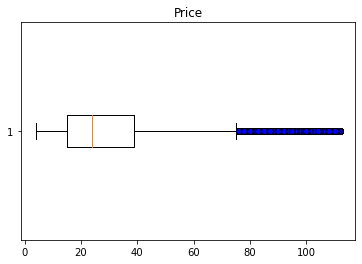

In [31]:
# re-examine price distribution with a boxplot
# let's look closer at price for outliers using matplotlib pyplot
blue_circle = dict(markerfacecolor='blue', marker='o')
# plt.subplots()
plt.title('Price')
plt.boxplot(wine_df_reduced['price'], vert=False, flierprops=blue_circle)

In [32]:
# what are the descriptive statistics for the wine_df_reduced dataset?
wine_df_reduced.describe()

# note the price variability was significantly reduced (new min= $4.00, new mean = $29.69 and new max = $112.00)
# this seams more reasonable and will make for better visualizations

points          price
count  131515.000000  131515.000000
mean       87.698126      29.686294
std         3.133728      19.400810
min        80.000000       4.000000
25%        86.000000      15.000000
50%        88.000000      24.000000
75%        90.000000      39.000000
max       100.000000     112.000000

<AxesSubplot:>

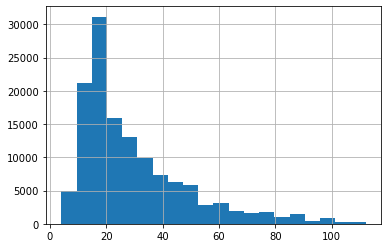

In [33]:
wine_df_reduced['price'].hist(bins=20)
# this seams more reasonable and will make for better visualizations

####     10. identify if any additional columns (features) could be created from existing features

In [34]:
# An additional column that represents "points per dollar" might be helpful

# start with a copy of the wine_df_reduced DataFrame (called wine_df_feature_engr) for feature engineering
wine_df_feature_engr = wine_df_reduced.copy()
wine_df_feature_engr.head()


country                   winery             variety        province  \
1   Spain  Bodega Carmen Rodríguez       Tinta de Toro  Northern Spain   
2      US                 Macauley     Sauvignon Blanc      California   
3      US                    Ponzi          Pinot Noir          Oregon   
4  France     Domaine de la Bégude  Provence red blend        Provence   
5   Spain                Numanthia       Tinta de Toro  Northern Spain   

            region_1                           variety_from_winery  \
1               Toro    Tinta de Toro_from_Bodega Carmen Rodríguez   
2     Knights Valley                 Sauvignon Blanc_from_Macauley   
3  Willamette Valley                         Pinot Noir_from_Ponzi   
4             Bandol  Provence red blend_from_Domaine de la Bégude   
5               Toro                  Tinta de Toro_from_Numanthia   

                                   name  points  price  \
1  Carodorum Selección Especial Reserva      96  110.0   
2         Special Selected Late Harvest      96   90.0   
3                               Reserve      96   65.0   
4                            La Brûlade      95   66.0   
5                             Numanthia      95   73.0   

                                         description  
1  Ripe aromas of fig, blackberry and cassis are ...  
2  Mac Watson honors the memory of a wine once ma...  
3  This spent 20 months in 30% new French oak, an...  
4  This is the top wine from La Bégude, named aft...  
5  Deep, dense and pure from the opening bell, th...

In [35]:
# note since all wines are awarded atleast 50 points this new columns will be the points per dollar (after 50 points)
wine_df_feature_engr['points_earned'] = wine_df_feature_engr['points'] - 50 # to account for the 5o points all wines get regardless of price
wine_df_feature_engr['points_earned'].value_counts()
 # this is what we would expect with only 5 wines having a point value of 50 (100 - 50 "free points")

37    18541
38    15627
40    14020
36    13955
35    11266
39    11162
34     9791
41     8930
42     7745
33     5631
43     4680
32     3804
44     2506
31     1408
45     1050
30      854
46      357
47      133
48       42
49        8
50        5
Name: points_earned, dtype: int64

In [36]:
wine_df_feature_engr['value_points_per_$'] = wine_df_feature_engr['points_earned'] / wine_df_feature_engr['price']
wine_df_feature_engr['value_points_per_$'].nunique() 

# there are now 1228 unique "value points per $".

1228

In [37]:
wine_df_feature_engr.head()

country                   winery             variety        province  \
1   Spain  Bodega Carmen Rodríguez       Tinta de Toro  Northern Spain   
2      US                 Macauley     Sauvignon Blanc      California   
3      US                    Ponzi          Pinot Noir          Oregon   
4  France     Domaine de la Bégude  Provence red blend        Provence   
5   Spain                Numanthia       Tinta de Toro  Northern Spain   

            region_1                           variety_from_winery  \
1               Toro    Tinta de Toro_from_Bodega Carmen Rodríguez   
2     Knights Valley                 Sauvignon Blanc_from_Macauley   
3  Willamette Valley                         Pinot Noir_from_Ponzi   
4             Bandol  Provence red blend_from_Domaine de la Bégude   
5               Toro                  Tinta de Toro_from_Numanthia   

                                   name  points  price  \
1  Carodorum Selección Especial Reserva      96  110.0   
2         Special Selected Late Harvest      96   90.0   
3                               Reserve      96   65.0   
4                            La Brûlade      95   66.0   
5                             Numanthia      95   73.0   

                                         description  points_earned  \
1  Ripe aromas of fig, blackberry and cassis are ...             46   
2  Mac Watson honors the memory of a wine once ma...             46   
3  This spent 20 months in 30% new French oak, an...             46   
4  This is the top wine from La Bégude, named aft...             45   
5  Deep, dense and pure from the opening bell, th...             45   

   value_points_per_$  
1            0.418182  
2            0.511111  
3            0.707692  
4            0.681818  
5            0.616438

In [38]:
# 6. identify if columns would make better sense if there were reordered
# let's reorder the DataFrame and not include the intermediate columns used in the calculation for value_points_per_$

column_names = ['country', 'winery', 'variety', 'province', 'region_1', 'name', 'points', 'price', 'points_earned', 'value_points_per_$','description']
wine_df_working = wine_df_feature_engr.reindex(columns=column_names)

wine_df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131515 entries, 1 to 150929
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             131515 non-null  object 
 1   winery              131515 non-null  object 
 2   variety             131515 non-null  object 
 3   province            131515 non-null  object 
 4   region_1            131515 non-null  object 
 5   name                131515 non-null  object 
 6   points              131515 non-null  int32  
 7   price               131515 non-null  float64
 8   points_earned       131515 non-null  int32  
 9   value_points_per_$  131515 non-null  float64
 10  description         131515 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 11.0+ MB


In [39]:
# make a copy of the dataframe for use below and call it df for simplicity
df = wine_df_working.copy()

In [40]:
# how many unique values for each feature?
df.nunique()

# there are 543 wine varieties (that is a lot to visualize)

country                  12
winery                13326
variety                 543
province                244
region_1               1352
name                  42268
points                   21
price                   109
points_earned            21
value_points_per_$     1228
description           85304
dtype: int64

#### 11. identify if additional hierarchical indexing would benefit the machine learning process (categorization)

In [41]:
# let's add an additional column that lists the wine style (this would be part of creating a hierarchical index)
# this would also make our visulizations easier to view (fewer colors in Tableau if we want to use color to visulize  a style of wine)
# this would start by adding a parent column for each wine variety.
# to do this I selected the "9 styles of Wine from Wine Folly"
# see https://winefolly.com/deep-dive/everything-you-need-to-know-about-wine-in-9-bottles/
# note I added "ROSÉ" with accent to better capture the Rose_Wine style (most styles include ROSÉ but do not use the singular label)
# I also added "SPARKLERS" to the "SPARKLING_WINE" key
# this dictionary could be improved but seems "go enough" to move forward

# create wine_variety_dictionary
wine_variety_dict = {
    "SPARKLING_WINE": ["CAVA", "CHAMPAGNE", "CRÉMANT", "CAP CLASSIQUE", "PROSECCO", "LAMBRUSCO", "SEKT", "AMERICAN SPARKLERS", "SPARKLERS"],
    "LIGHT-BODIED_WHITE_WINE": ["PINOT GRIGIO", "PINOT GRIS", "SAUVIGNON BLANC", "CHENIN BLANC", "MUSCADET", "ALBARIÑO", "ASSYRTIKO", "GARGANEGA", "SOAVE", "GRÜNER VELTLINER", "CHASSELAS", "VERMENTINO", "VERDICCHIO", "VINHO VERDE", "PICPOUL"],
    "FULL-BODIED_WHITE_WINE": ["CHARDONNAY", "VIOGNIER", "MARSANNE", "ROUSSANNE", "GRENACHE BLANC", "SÉMILLON", "AGED RIOJA BLANCO"],
    "AROMATIC_WHITE_WINE": ["RIESLING", "TORRONTÉS", "MOSCATO", "MUSKATELLER", "MOSCATEL", "GEWÜRZTRAMINER", "MOSCHOFILERO"],
    "ROSÉ_WINE": ["ROSÉ", "PROVENCE ROSÉ", "SANGIOVESE ROSÉ", "GARNACHA ROSÉ", "PINOT NOIR ROSÉ", "SYRAH ROSÉ", "CABERNET FRANC ROSÉ", "BEAUJOLAIS ROSÉ", "WHITE ZINFANDEL"],
    "LIGHT-BODIED_RED_WINE": ["PINOT NOIR", "GAMAY", "BEAUJOLAIS", "FRAPPATO", "CINSAULT", "NERELLO MASCALESE", "SCHIAVA", "ZWEIGELT", "LAMBRUSCO"],
    "MEDIUM-BODIED_RED_WINE": ["MERLOT", "GRENACHE", "SANGIOVESE", "TEMPRANILLO", "BARBERA", "CABERNET FRANC", "DOLCETTO", "CARMÉNÈRE", "BLAUFRÄNKISCH", "VALPOLICELLA BLENDS", "MENCÍA", "MONTEPULCIANO", "NEBBIOLO", "XINOMAVRO", "ZINFANDEL"],
    "FULL-BODIED_RED_WINE": ["CABERNET SAUVIGNON", "SYRAH", "SHIRAZ", "BORDEAUX BLEND", "MALBEC", "MONASTRELL", "NERO D’AVOLA", "PETITE SIRAH", "PETIT VERDOT", "PINOTAGE", "SAGRANTINO", "TANNAT", "TOURIGA NACIONAL"],
    "DESSERT_/_OTHER_WINE": ["SHERRY", "PORT", "SAUTERNAIS", "ICE WINE", "MADEIRA", "MARSALA", "MOSCATEL DE SETÚBAL", "VIN SANTO", "MUSCAT OF ALEXANDRIA"]
}
# wine_variety_dict


In [42]:
# convert the values in dictionary to title case (per the variety column in our dataframe)
new_wine_dict_values = {key: list(map(str.title, wine_variety_dict[key])) for key in wine_variety_dict}
# new_wine_dict_values

In [43]:
# convert keys in dictionary to title case
new_wine_dict_keys = dict((k.title(), v) for k, v in new_wine_dict_values.items())
# new_wine_dict_keys

In [44]:
# rename new dictionary as style_dict
# style_dict better identifies the contents of the dictionary
wine_style_dictionary = new_wine_dict_keys

In [45]:
# examine the dictionary
wine_style_dictionary

{'Sparkling_Wine': ['Cava',
  'Champagne',
  'Crémant',
  'Cap Classique',
  'Prosecco',
  'Lambrusco',
  'Sekt',
  'American Sparklers',
  'Sparklers'],
 'Light-Bodied_White_Wine': ['Pinot Grigio',
  'Pinot Gris',
  'Sauvignon Blanc',
  'Chenin Blanc',
  'Muscadet',
  'Albariño',
  'Assyrtiko',
  'Garganega',
  'Soave',
  'Grüner Veltliner',
  'Chasselas',
  'Vermentino',
  'Verdicchio',
  'Vinho Verde',
  'Picpoul'],
 'Full-Bodied_White_Wine': ['Chardonnay',
  'Viognier',
  'Marsanne',
  'Roussanne',
  'Grenache Blanc',
  'Sémillon',
  'Aged Rioja Blanco'],
 'Aromatic_White_Wine': ['Riesling',
  'Torrontés',
  'Moscato',
  'Muskateller',
  'Moscatel',
  'Gewürztraminer',
  'Moschofilero'],
 'Rosé_Wine': ['Rosé',
  'Provence Rosé',
  'Sangiovese Rosé',
  'Garnacha Rosé',
  'Pinot Noir Rosé',
  'Syrah Rosé',
  'Cabernet Franc Rosé',
  'Beaujolais Rosé',
  'White Zinfandel'],
 'Light-Bodied_Red_Wine': ['Pinot Noir',
  'Gamay',
  'Beaujolais',
  'Frappato',
  'Cinsault',
  'Nerello Masca

In [46]:
df['variety'].head(20)

1          Tinta de Toro
2        Sauvignon Blanc
3             Pinot Noir
4     Provence red blend
5          Tinta de Toro
6          Tinta de Toro
7          Tinta de Toro
8             Pinot Noir
9             Pinot Noir
10              Friulano
11            Pinot Noir
12            Pinot Noir
13                Tannat
15            Chardonnay
17           Tempranillo
19            Pinot Noir
20                  Rosé
21     Tempranillo Blend
23            Chardonnay
24            Pinot Noir
Name: variety, dtype: object

In [47]:
# iterate through each row in the DataFrame and create a style dictionary that contains the index and wine style
# this will be used to add a new column on wine_style in the DataFrame
style_dict = {}
for index, row in df.iterrows():
    print(index, row['variety'])
    # iterate over each key value in the wine_dictionary
    for key, value in wine_style_dictionary.items():
        # if the row['variety'] is in a dictionary value    
        if row['variety'] in value:
                style_dict.update({index: key})


1 Tinta de Toro
2 Sauvignon Blanc
3 Pinot Noir
4 Provence red blend
5 Tinta de Toro
6 Tinta de Toro
7 Tinta de Toro
8 Pinot Noir
9 Pinot Noir
10 Friulano
11 Pinot Noir
12 Pinot Noir
13 Tannat
15 Chardonnay
17 Tempranillo
19 Pinot Noir
20 Rosé
21 Tempranillo Blend
23 Chardonnay
24 Pinot Noir
25 Chardonnay
26 Pinot Noir
27 Pinot Noir
28 Pinot Noir
29 Syrah
31 Chardonnay
33 Sparkling Blend
34 Chardonnay
36 Rhône-style White Blend
37 Sangiovese
38 Sangiovese
39 Red Blend
40 Mencía
41 Palomino
42 Petite Sirah
43 Red Blend
44 Syrah
45 Red Blend
46 Sangiovese
47 Cabernet Sauvignon
48 Sangiovese
49 Cabernet Sauvignon
50 Sangiovese
51 Chardonnay
52 Sauvignon Blanc
53 Pinot Noir
54 Chardonnay
55 Cabernet Sauvignon
57 Riesling
58 Cabernet Sauvignon-Syrah
59 Red Blend
60 Malbec
61 Pinot Noir
62 Malbec
63 Chardonnay
64 Portuguese Red
65 Syrah
66 Chardonnay
67 Cabernet Sauvignon
68 Pinot Noir
69 Cabernet Sauvignon
70 Cabernet Sauvignon
71 Pinot Noir
73 Pinot Gris
74 Portuguese Red
75 Pinot Noir
76 C

In [48]:
# review dictionary
style_dict

{2: 'Light-Bodied_White_Wine',
 3: 'Light-Bodied_Red_Wine',
 8: 'Light-Bodied_Red_Wine',
 9: 'Light-Bodied_Red_Wine',
 11: 'Light-Bodied_Red_Wine',
 12: 'Light-Bodied_Red_Wine',
 13: 'Full-Bodied_Red_Wine',
 15: 'Full-Bodied_White_Wine',
 17: 'Medium-Bodied_Red_Wine',
 19: 'Light-Bodied_Red_Wine',
 20: 'Rosé_Wine',
 23: 'Full-Bodied_White_Wine',
 24: 'Light-Bodied_Red_Wine',
 25: 'Full-Bodied_White_Wine',
 26: 'Light-Bodied_Red_Wine',
 27: 'Light-Bodied_Red_Wine',
 28: 'Light-Bodied_Red_Wine',
 29: 'Full-Bodied_Red_Wine',
 31: 'Full-Bodied_White_Wine',
 34: 'Full-Bodied_White_Wine',
 37: 'Medium-Bodied_Red_Wine',
 38: 'Medium-Bodied_Red_Wine',
 40: 'Medium-Bodied_Red_Wine',
 42: 'Full-Bodied_Red_Wine',
 44: 'Full-Bodied_Red_Wine',
 46: 'Medium-Bodied_Red_Wine',
 47: 'Full-Bodied_Red_Wine',
 48: 'Medium-Bodied_Red_Wine',
 49: 'Full-Bodied_Red_Wine',
 50: 'Medium-Bodied_Red_Wine',
 51: 'Full-Bodied_White_Wine',
 52: 'Light-Bodied_White_Wine',
 53: 'Light-Bodied_Red_Wine',
 54: 'Full-Bodi

In [49]:
# use the style_dict to create a new column in the df DataFrame
df['wine_style'] = pd.Series(style_dict)

In [50]:
# examine the dataframe
df.head()

country                   winery             variety        province  \
1   Spain  Bodega Carmen Rodríguez       Tinta de Toro  Northern Spain   
2      US                 Macauley     Sauvignon Blanc      California   
3      US                    Ponzi          Pinot Noir          Oregon   
4  France     Domaine de la Bégude  Provence red blend        Provence   
5   Spain                Numanthia       Tinta de Toro  Northern Spain   

            region_1                                  name  points  price  \
1               Toro  Carodorum Selección Especial Reserva      96  110.0   
2     Knights Valley         Special Selected Late Harvest      96   90.0   
3  Willamette Valley                               Reserve      96   65.0   
4             Bandol                            La Brûlade      95   66.0   
5               Toro                             Numanthia      95   73.0   

   points_earned  value_points_per_$  \
1             46            0.418182   
2             46            0.511111   
3             46            0.707692   
4             45            0.681818   
5             45            0.616438   

                                         description               wine_style  
1  Ripe aromas of fig, blackberry and cassis are ...                      NaN  
2  Mac Watson honors the memory of a wine once ma...  Light-Bodied_White_Wine  
3  This spent 20 months in 30% new French oak, an...    Light-Bodied_Red_Wine  
4  This is the top wine from La Bégude, named aft...                      NaN  
5  Deep, dense and pure from the opening bell, th...                      NaN

In [51]:
# the result of the match
df['wine_style'].value_counts().sum()

# Using the wine folly dictionary, 93,557 wines were matched (variety to wine_style)

93557

In [52]:
# can we identify which wine variety contain 
df[df['variety'].str.contains("^Ros.*")].count(0)

country               2466
winery                2466
variety               2466
province              2466
region_1              2466
name                  2466
points                2466
price                 2466
points_earned         2466
value_points_per_$    2466
description           2466
wine_style            2416
dtype: int64

In [53]:
df['wine_style'].value_counts()

# note this step was done initally after no Rose wine categories were matched
# note the Rose Wine category now matches these 2,416 rose wine's (this was because we add "Rosé" to our )

Full-Bodied_Red_Wine       24003
Medium-Bodied_Red_Wine     18991
Full-Bodied_White_Wine     15152
Light-Bodied_Red_Wine      13931
Light-Bodied_White_Wine    11030
Aromatic_White_Wine         6677
Rosé_Wine                   2416
Dessert_/_Other_Wine         842
Sparkling_Wine               515
Name: wine_style, dtype: int64

In [54]:
# how many did not match?
df['wine_style'].isna().sum()

# Using our simple wine folley dictionary, 37,958 did not match

37958

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131515 entries, 1 to 150929
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             131515 non-null  object 
 1   winery              131515 non-null  object 
 2   variety             131515 non-null  object 
 3   province            131515 non-null  object 
 4   region_1            131515 non-null  object 
 5   name                131515 non-null  object 
 6   points              131515 non-null  int32  
 7   price               131515 non-null  float64
 8   points_earned       131515 non-null  int32  
 9   value_points_per_$  131515 non-null  float64
 10  description         131515 non-null  object 
 11  wine_style          93557 non-null   object 
dtypes: float64(2), int32(2), object(8)
memory usage: 12.0+ MB


In [56]:
# going forward let's use only those wines for which were could match a wine_style (93,557)
# start by making a copy of the df dataframe called df_matched
df_matched = df.copy()

In [57]:
# now drop all rows in the dataframe where wine_style is NaN using dropna method  
df_matched.dropna(subset=['wine_style'], inplace=True)

df_matched.count()


country               93557
winery                93557
variety               93557
province              93557
region_1              93557
name                  93557
points                93557
price                 93557
points_earned         93557
value_points_per_$    93557
description           93557
wine_style            93557
dtype: int64

In [58]:
# 6. identify if columns would make better sense if there were reordered
# let's reorder the DataFrame

column_names = ['country', 'province', 'region_1', 'winery', 'wine_style', 'variety', 'name', 'points', 'price', 'points_earned','value_points_per_$','description']
df_matched = df_matched.reindex(columns=column_names)
df_matched

country            province            region_1  \
2           US          California      Knights Valley   
3           US              Oregon   Willamette Valley   
8           US              Oregon  Chehalem Mountains   
9           US          California        Sonoma Coast   
11          US              Oregon        Ribbon Ridge   
...        ...                 ...                 ...   
150909  France            Burgundy   Nuits-St.-Georges   
150910  France            Burgundy   Chambolle-Musigny   
150911  France            Burgundy   Nuits-St.-Georges   
150912  France            Burgundy   Chambolle-Musigny   
150929   Italy  Northeastern Italy          Alto Adige   

                        winery               wine_style          variety  \
2                     Macauley  Light-Bodied_White_Wine  Sauvignon Blanc   
3                        Ponzi    Light-Bodied_Red_Wine       Pinot Noir   
8                    Bergström    Light-Bodied_Red_Wine       Pinot Noir   
9                    Blue Farm    Light-Bodied_Red_Wine       Pinot Noir   
11      Patricia Green Cellars    Light-Bodied_Red_Wine       Pinot Noir   
...                        ...                      ...              ...   
150909             Daniel Rion    Light-Bodied_Red_Wine       Pinot Noir   
150910             Michel Gros    Light-Bodied_Red_Wine       Pinot Noir   
150911             Michel Gros    Light-Bodied_Red_Wine       Pinot Noir   
150912             Daniel Rion    Light-Bodied_Red_Wine       Pinot Noir   
150929           Alois Lageder  Light-Bodied_White_Wine     Pinot Grigio   

                                   name  points  price  points_earned  \
2         Special Selected Late Harvest      96   90.0             46   
3                               Reserve      96   65.0             46   
8                                Silice      95   65.0             45   
9                  Gap's Crown Vineyard      95   60.0             45   
11      Estate Vineyard Wadensvil Block      95   48.0             45   
...                                 ...     ...    ...            ...   
150909             Clos dea Argillieres      89   52.0             39   
150910      Pinot Noir_from_Michel Gros      89   38.0             39   
150911                     Les Chaliots      87   37.0             37   
150912                      Les Charmes      87   65.0             37   
150929  Pinot Grigio_from_Alois Lageder      90   15.0             40   

        value_points_per_$                                        description  
2                 0.511111  Mac Watson honors the memory of a wine once ma...  
3                 0.707692  This spent 20 months in 30% new French oak, an...  
8                 0.692308  This re-named vineyard was formerly bottled as...  
9                 0.750000  The producer sources from two blocks of the vi...  
11                0.937500  From 18-year-old vines, this supple well-balan...  
...                    ...                                                ...  
150909            0.750000  This is a lovely, fragrant Burgundy, with a sm...  
150910            1.026316  Scents of graham cracker and malted milk choco...  
150911            1.000000  This needs a good bit of breathing time, then ...  
150912            0.569231  The nose is dominated by the attractive scents...  
150929            2.666667  More Pinot Grigios should taste like this. A r...  

[93557 rows x 12 columns]

In [59]:
df_matched['wine_style'].value_counts()

Full-Bodied_Red_Wine       24003
Medium-Bodied_Red_Wine     18991
Full-Bodied_White_Wine     15152
Light-Bodied_Red_Wine      13931
Light-Bodied_White_Wine    11030
Aromatic_White_Wine         6677
Rosé_Wine                   2416
Dessert_/_Other_Wine         842
Sparkling_Wine               515
Name: wine_style, dtype: int64

In [60]:
# # add an additional hiearchy that identifies wines as red, white or other based on wine_style
# # create wine_style_dictionary
# wine_style_dictionary = {
#     "Red_wine" : ["Full-Bodied_Red_Wine", "Medium-Bodied_Red_Wine", "Light-Bodied_Red_Wine"],
#     "Other_wine" : ["Rosé_Wine", "Dessert_/_Other_Wine", "Sparkling_Wine"],
#     "White_wine" : ["Full-Bodied_White_Wine", "Light-Bodied_White_Wine", "Aromatic_White_Wine"]    
# }

# wine_style_dictionary

In [61]:
############# working

In [62]:
# iterate through each row in the DataFrame and create a style dictionary that contains the index and wine style
# this will be used to add a new column on wine_style in the DataFrame
# style_dict = {}
# for index, row in df.iterrows():
#     print(index, row['variety'])
#     # iterate over each key value in the wine_dictionary
#     for key, value in wine_style_dictionary.items():
#         # if the row['variety'] is in a dictionary value    
#         if row['variety'] in value:
#                 style_dict.update({index: key})


In [63]:
############### working

In [64]:
# # using df_matched iterate each row in the DataFrame and create a wine_type dictionary that contains the index and wine_type
# # this will be used to add a new column on wine_style in the DataFrame
# wine_type_dict = {}
# for index, row in df_matched.iterrows():
#     print(index, row['wine_style'])
#     # iterate over each key value in the wine_dictionary
#     for key, value in wine_style_dictionary.items():
#         # if the row['wine_style'] is in a dictionary value    
#         if row['wine_style'] in value:
#                 wine_type_dict.update({index: key})


In [65]:
# wine_type_dict

In [66]:
# # create a new column called "wine_type"
# # use the wine_type_dict to create a new column in the df DataFrame
# df_matched['wine_type'] = pd.Series(wine_type_dict)

In [67]:
# df_matched.head()

In [68]:
# # examine the df_matched info and dtypes
# df_matched.info()
# df_matched.dtypes

In [69]:
# # reorder columns
# column_names = ['country', 'province', 'region_1', 'winery', 'wine_type', 'wine_style', 'variety', 'name', 'points', 'price', 'points_earned', 'value_points_per_$','description']
# df_matched = df_matched.reindex(columns=column_names)

# df_matched.head()

In [70]:
df_matched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93557 entries, 2 to 150929
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             93557 non-null  object 
 1   province            93557 non-null  object 
 2   region_1            93557 non-null  object 
 3   winery              93557 non-null  object 
 4   wine_style          93557 non-null  object 
 5   variety             93557 non-null  object 
 6   name                93557 non-null  object 
 7   points              93557 non-null  int32  
 8   price               93557 non-null  float64
 9   points_earned       93557 non-null  int32  
 10  value_points_per_$  93557 non-null  float64
 11  description         93557 non-null  object 
dtypes: float64(2), int32(2), object(8)
memory usage: 8.6+ MB


#### Export to csv file called wine_final.csv

In [71]:
# export to CSV file 
df_matched.to_csv('wine_style_and_variety.csv', index=False, header=True)